In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_to_load= "../Project_1/employee_reviews.csv"
review_data= pd.read_csv(file_to_load)


In [2]:
review_data.head(1)

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...


In [3]:
company_summary_df=review_data.groupby(["company"]).agg({"company":["count"],"overall-ratings":["mean","median"]}).reset_index()
company_summary_df.columns = ["Company" , "#_of_reviews", "avg_rating","median_rating"]
company_summary_df

,Company,#_of_reviews,avg_rating,median_rating
0,amazon,26430,3.587363,4.0
1,apple,12950,3.958224,4.0
2,facebook,1590,4.511950,5.0
3,google,7819,4.339430,5.0
4,microsoft,17930,3.816564,4.0
5,netflix,810,3.411111,4.0


In [4]:
amazon_df=review_data[review_data['company']=='amazon']
apple_df=review_data[review_data['company']=='apple']
facebook_df=review_data[review_data['company']=='facebook']
google_df=review_data[review_data['company']=='google']
microsoft_df=review_data[review_data['company']=='microsoft']
netflix_df=review_data[review_data['company']=='netflix']

netflix_df_short= netflix_df.head(10)
netflix_df.head(1)

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
35839,35840,netflix,none,"Oct 22, 2018",Current Employee - Anonymous Employee,Executive Assistant,Open communication. Top of market pay. Extreme...,"Very meeting heavy, which isn't a con, but doe...",Please continue to do what you've been doing.,5.0,4.0,5.0,5.0,4.0,4.0,2,https://www.glassdoor.com/Reviews/Netflix-Revi...


In [5]:
type(('Oct 22, 2018'))
time_test = netflix_df_short.iloc[0,3]

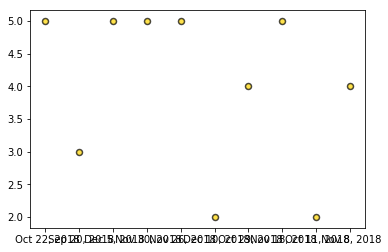

In [6]:
plt.scatter(netflix_df_short["dates"], netflix_df_short["overall-ratings"],color='gold', edgecolor='k', 
            marker='o', linewidth=1.5,alpha=0.7)
plt.show()

In [7]:
from datetime import datetime

datetime_object = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')
datetime_object

time_test = time_test.replace(",","").strip()

datetime_test = datetime.strptime(time_test,'%b %d %Y')
print(datetime_test)


2018-10-22 00:00:00


In [8]:
netflix_t_test = netflix_df_short.iloc[:,3]

In [10]:
def time_convert(time):
    conv_time = time.replace(",","").strip()
    new_time = datetime.strptime(conv_time, '%b %d %Y')
    return(new_time)

netflix_df_short['dates'] = netflix_df_short['dates'].apply(time_convert)
netflix_df_short

#for row in netflix_t_test:
#    time=row.replace(",","").strip()
#    new_time=datetime.strptime(time,'%b %d %Y')
#    print(new_time)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
35839,35840,netflix,none,2018-10-22,Current Employee - Anonymous Employee,Executive Assistant,Open communication. Top of market pay. Extreme...,"Very meeting heavy, which isn't a con, but doe...",Please continue to do what you've been doing.,5.0,4.0,5.0,5.0,4.0,4.0,2,https://www.glassdoor.com/Reviews/Netflix-Revi...
35840,35841,netflix,none,2018-09-20,Current Employee - Anonymous Employee,How much does a functioning human cost?,- Paycheck - So many good people - Such a grea...,I have been working for a year at Netflix. I'...,Ask yourself those questions,3.0,2.0,1.0,5.0,5.0,4.0,52,https://www.glassdoor.com/Reviews/Netflix-Revi...
35841,35842,netflix,none,2018-12-05,Former Employee - Anonymous Employee,QA Tester Contractor,"Great personalities, great work culture, free ...",None really at all at the moment,none,5.0,none,none,none,none,none,1,https://www.glassdoor.com/Reviews/Netflix-Revi...
35842,35843,netflix,"Los Angeles, CA",2018-11-30,Former Employee - Video Editor,Netflix Editor,Excellent Projects with Pros from throughout t...,Still setting the feel of the company,none,5.0,4.0,3.0,4.0,4.0,3.0,0,https://www.glassdoor.com/Reviews/Netflix-Revi...
35843,35844,netflix,none,2018-11-26,Former Employee - Anonymous Employee,I love it,It was great and i loved it,Not enough free snack especially chips,none,5.0,5.0,5.0,5.0,5.0,5.0,0,https://www.glassdoor.com/Reviews/Netflix-Revi...
35844,35845,netflix,none,2018-12-10,Former Employee - Anonymous Employee,Ok,Many great people to work with and learn from,Lack of accountability for management,none,2.0,3.0,1.0,1.0,5.0,1.0,0,https://www.glassdoor.com/Reviews/Netflix-Revi...
35845,35846,netflix,"Los Angeles, CA",2018-10-29,Current Employee - Anonymous Employee,"Great company, with some growing pains",When they say that Netflix chooses stunning co...,"Work life balance is a thing, but I do think a...",Bolster your training for new managers (especi...,4.0,4.0,5.0,4.0,5.0,4.0,8,https://www.glassdoor.com/Reviews/Netflix-Revi...
35846,35847,netflix,none,2018-11-18,Former Employee - Anonymous Employee,Operations Manager,"Great Benefits, pay, location, with great mana...",Dvd business continuing to decline.,none,5.0,5.0,5.0,5.0,5.0,5.0,0,https://www.glassdoor.com/Reviews/Netflix-Revi...
35847,35848,netflix,"Los Gatos, CA",2018-10-11,Former Employee - Anonymous Employee,"Culture of fear is real, tone deaf culture tha...",- Great place if you love a high base salary. ...,- The culture of fear that's been talked about...,"""Diversity and inclusion"" should really mean d...",2.0,2.0,1.0,3.0,4.0,2.0,35,https://www.glassdoor.com/Reviews/Netflix-Revi...
35848,35849,netflix,"London, CA",2018-11-08,Former Employee - N/A,Very friendly,Lovely staff very great career opportunities l...,Poor career development opportunity yes,idk just writing this review so i can get acce...,4.0,4.0,4.0,4.0,3.0,3.0,0,https://www.glassdoor.com/Reviews/Netflix-Revi...
